In [67]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from datetime import datetime

plt.style.use("Solarize_Light2")



In [2]:
%%time

df_off = pd.read_csv("data/cleaned_data.csv")


CPU times: total: 297 ms
Wall time: 333 ms


Analyse des variables : 


Analyse de la repartition des nutriscores :

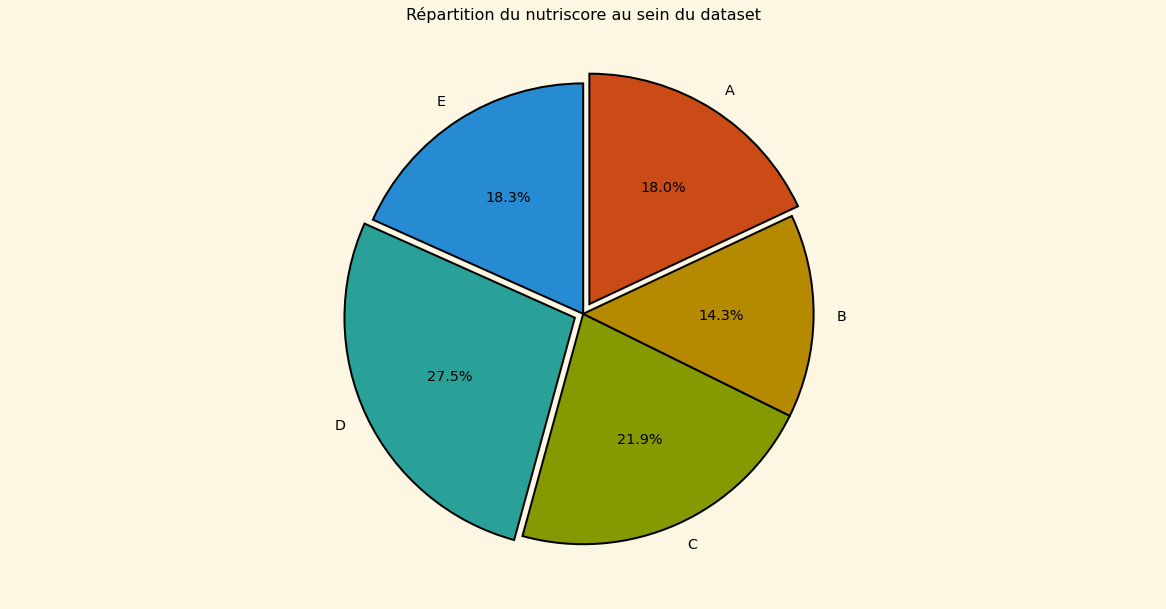

In [128]:
grades = df_off["nutrition_grade_fr"].unique()

amount = {}

for grade in grades:
        amount[grade] = df_off['nutrition_grade_fr'].value_counts()[grade]

slices = list(amount.values())
labels = [key.upper() for key in amount.keys()]

textprops = {
    "size": "x-large",
}

fig = plt.figure(figsize=(16,8))

explode = (0, 0.04, 0, 0, 0.05)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(slices, labels=labels, startangle=90, explode=explode, textprops=textprops,
        autopct='%1.1f%%', wedgeprops={'linewidth': 2,'edgecolor': 'black'})

# plt.xkcd()
plt.title("Répartition du nutriscore au sein du dataset")
plt.show()



<h2><u>Analyse du graphe de repartition du nutriscore au sein du dataset :</u></h2>

- Les notes que l'ont peut considérer comme mauvaises (E, D et, pour certaines catégories, C) dominent largement le dataset
- A première vue, les propositions de produits de meilleur qualité selon le Nutriscore se montreront pertinentes. Il convient de faire une analyse du Nutriscore par categorie (PNNS groups 1 & 2) afin de vérifier cette hypothèse.
- Si cette observation globale se confirme parmi les grandes categories mises en places par le PNNS, l'intérêt et le potentiel de l'application seraient renforcés.

<hr>
Il convient d'analyser d'une part l'hypothèse émise plus haut et d'autre part la pertinence du Nutriscore comme outil de mesure qualitatif.
<hr>

<h2><u>Proportion de produits évalués dans le cas des variables "bio" et "huile de palme"</u></h2>

Lors du nettoyage du dataset, plusieurs labels parmi les labels "bio" les plus communs ont été sélectionnés et une tentative d'assertion de la présence d'huile de palme dans les produits a été effectuée.
<br>
Nous pouvons établir la proportion de ces évaluations respectives au sein de nos données. (<i>A noter que les produits dont la variable "Bio" a été évaluée, le label était présent et donc le produit est labellisé bio</i>)

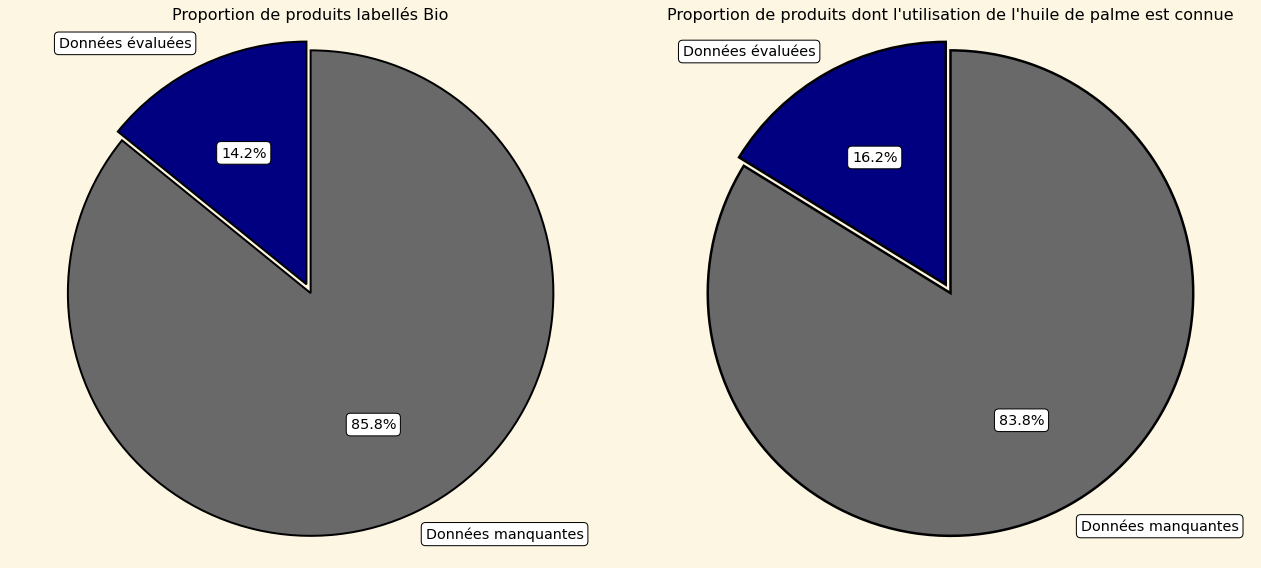

In [4]:
total_products = len(df_off)

rated_organic = df_off["organic"].notna().sum()
organic_data = [rated_organic, total_products - rated_organic]
rated_palm_oil = df_off["palm_oil"].notna().sum()
palm_oil_data = [rated_palm_oil, total_products - rated_palm_oil]

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

labels = ["Données évaluées", "Données manquantes"]

bbox=dict(facecolor='white', edgecolor='black', boxstyle="round")

textprops = {
    "size": "x-large",
    "bbox": bbox,
    "backgroundcolor": "white",
    
}

colors = ["navy", "dimgrey"]

ax1.axis('equal')
ax2.axis('equal')

ax1.pie(
    organic_data, startangle=90, autopct='%1.1f%%',
    wedgeprops={'linewidth': 2,'edgecolor': 'black'},
    labels=labels, textprops=textprops, colors=colors,
    explode=[0.04, 0]
    )

ax2.pie(
    palm_oil_data, startangle=90, autopct='%1.1f%%',
    wedgeprops={'linewidth': 2.5,'edgecolor': 'black'},
    labels=labels, textprops=textprops, colors=colors,
    explode=[0.04, 0]
    )

ax1.set_title("Proportion de produits labellés Bio")
ax2.set_title("Proportion de produits dont l'utilisation de l'huile de palme est connue")

plt.tight_layout()

plt.show()


Dans les deux cas, le chiffre peut sembler faible mais, d'une part :

- Selon l’Observatoire de la distribution responsable (FCD) rapporte qu'en 2019 4.8% des produits trouvés en grande surface étaient d'origine "Bio". Les données évaluées ont toutes un label "Bio" listé dans le notebook de nettoyage.
- L'Observatoire des aliments affirme qu'un tiers des produits consommés contiennent de l'huile de palme. Dans le cas de l'indicateur calculé, il est évalué <b>si possible</b> si oui ou non l'huile de palme est utilisée. Le dataset est sans aucun doute incomplet et des données supplémentaires seraient requises.

> <h3>remarque sur PNNS group : </h3>

Le Programme National Nutrition Santé et les groupes formés par celui ci sont à plus large spectre que les categories.


In [5]:
print("Echantillon pnns_group_1", len(df_off["pnns_groups_1"].unique()))
print("Echantillon pnns_group_2", len(df_off["pnns_groups_2"].unique()))
print("Echantillon main_category_fr", len(df_off["main_category_fr"].unique()))
print("Echantillon categories_fr", len(df_off["categories_fr"].unique()))


Echantillon pnns_group_1 14
Echantillon pnns_group_2 40
Echantillon main_category_fr 837
Echantillon categories_fr 10575



- Les variables "main_category_fr" et "categories_fr" seront utiles à l'application en production. Elles permettront d'offrir plus précisément un meilleur candidat de remplacement au produit sélectionné.
- Les variables du PNNS sont plus restrictives, moins pertinentes dans un cas de comparaison, mais si elles sont assez peuplées elles peuvent permettre d'étudier les possibles corrélations entre le Nutriscore et la catégorie.

In [6]:

print("pnns_1_pop =", df_off["pnns_groups_1"].notna().sum())
print("pnns_2_pop = ", df_off["pnns_groups_2"].notna().sum())
print("Echantillon :", len(df_off))


pnns_1_pop = 39158
pnns_2_pop =  39241
Echantillon : 39241


<h2>Les deux groupes pnns peuvent utilisés avec précision.<h2>

- pnns_groups_1 : la représentation des produits est légèrement plus faible mais les critères sont plus restrictif, permettant un jugement d'ensemble
- pnns_groups_2 : ce groupe contient 40 groupes uniques mais couvre la totalité de notre dataset.

<h2>Représentation de la repartition des données en fonction de leur derniere data de modification :</h2>

- Les données sont au format timestamp UNIX
- Groupement par année : les timestamps sont calculés du timestamp le plus ancien au plus récent, par timestamp du premier janvier au 31 décembre de l'année

In [63]:
data_t = df_off["last_modified_t"]

oldest = datetime.fromtimestamp(data_t.min())
newest = datetime.fromtimestamp(data_t.max())

print(f"Les données s'étendent sur la periode {oldest} à {newest}")

Les données s'étendent sur la periode 2012-04-08 10:12:35 à 2017-04-21 02:53:41


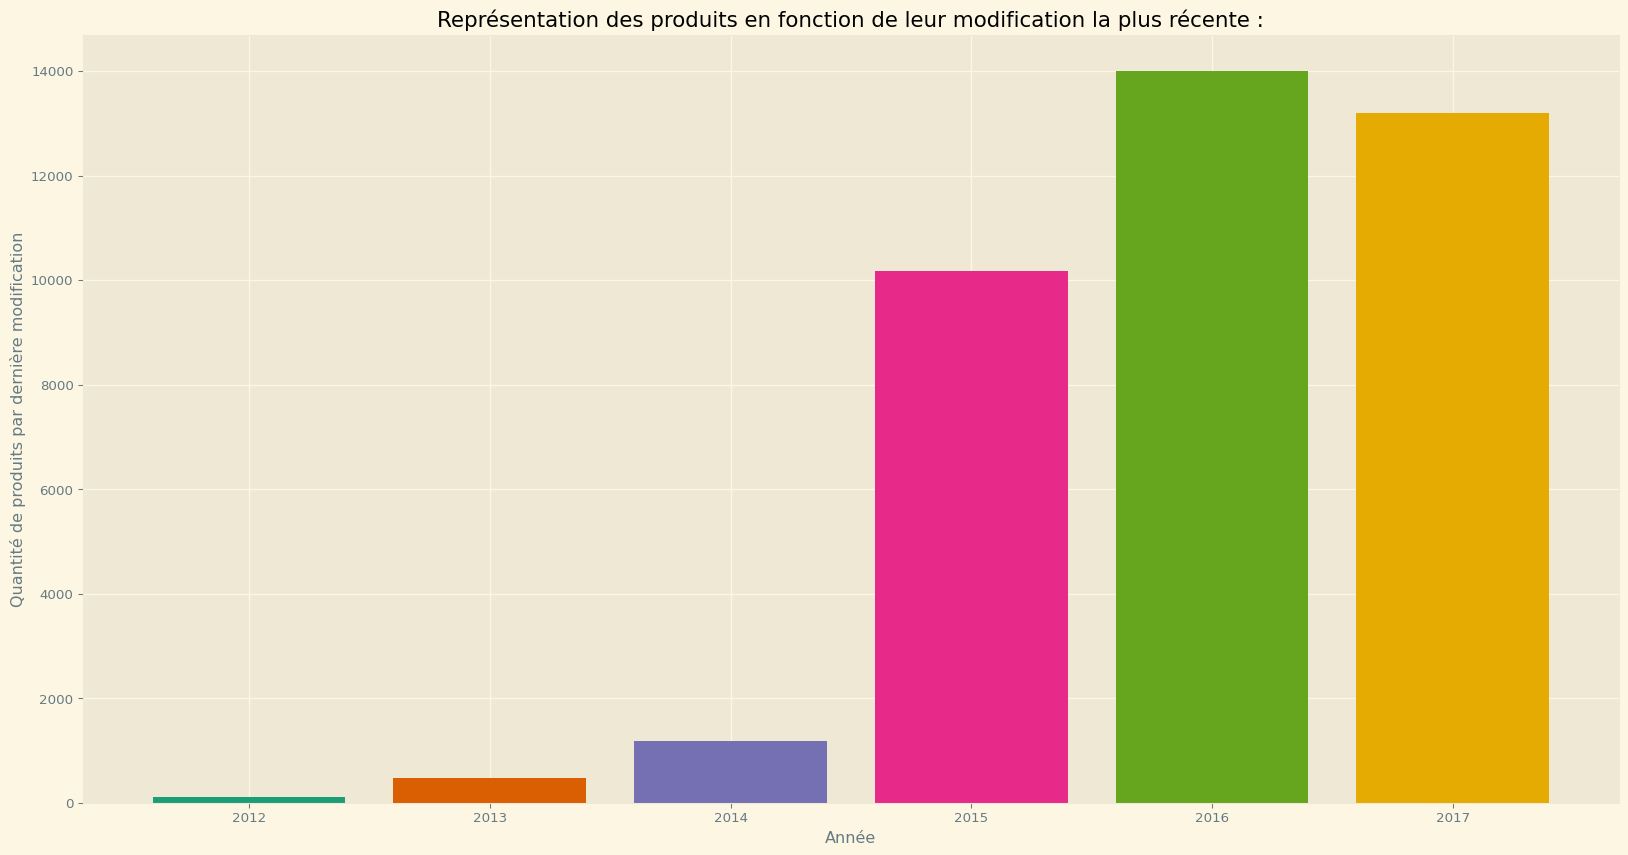

In [125]:

t_dict = {}

for year in range(2012, 2018, 1):
    jan_1=datetime(year=year, month=1, day=1).timestamp(),
    dec_31=datetime(year=year, month=12, day=31).timestamp(),
    t_dict[year] = len(data_t[(data_t > jan_1) & (data < dec_31)])


used_cmap = plt.get_cmap("Dark2")

fig = plt.figure(figsize=(16, 8), dpi=96)
ax = fig.add_axes([0,0,1,1])

ax.bar(t_dict.keys(), t_dict.values(), color=used_cmap.colors)

ax.set_ylabel("Quantité de produits par dernière modification")
ax.set_xlabel("Année")

title = "Représentation des produits en fonction de leur modification la plus récente :"

ax.set_title(title)
plt.show()


Par rapport à la donnée la plus récente, les autres produits ont été majoritairement mis à jour, pour la plus grande partie, 2 ans maximum avant le produit le plus récent. On peut donc considérer les données comme relativement à jour :

- Le Nutriscore a été proposé en 2014 et adopté en 2016
- Il semblerait qu'Open Food Facts ait proposé, avant son application, un système similaire <a href="https://fr.openfoodfacts.org/discover" target="blank">sur leur blog</a>
- Le Programme National Nutrition Santé a été établi en 2001 et prolongé depuis, les données peuvent donc être associées


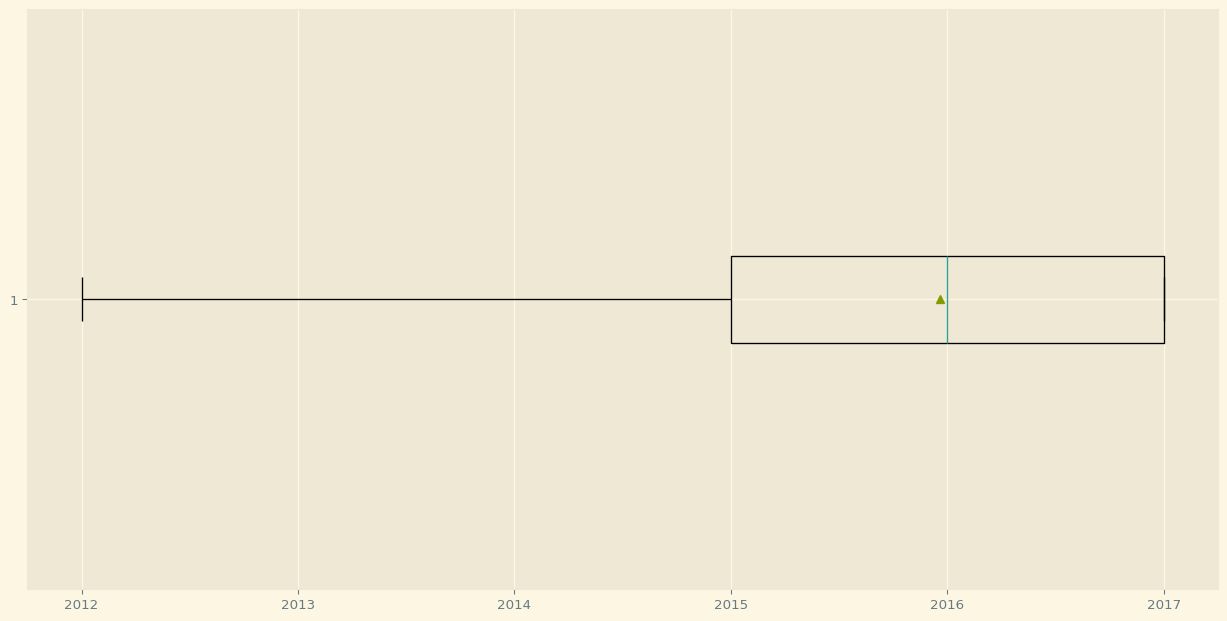

In [151]:
box = plt.figure(figsize=(16, 8), dpi=96)
plt.boxplot([datetime.fromtimestamp(ts).year for ts in data_t], vert=0, showmeans=True, showfliers=True)
plt.show()


Ce boxplot confirme que la très grande majorité (dès le premier quartile) des données ont été mises à jour post 2015, la notion de Nutriscore étant apparue en 2014, cela peut impliquer que, pour la très large majorité du dataset, le Nutriscore ait été ajouté après sa définition. Les valeurs anterieures à 2014 doivent avoir été calculées par le site, ou obtenues d'une autre manière (fusion des duplicatas avant publication du dataset, erreur de mise à jour de la variable "last_modified_t" (rare mais présente dans le dataset original) etc.)